1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
%matplotlib inline
npr.seed(205888)

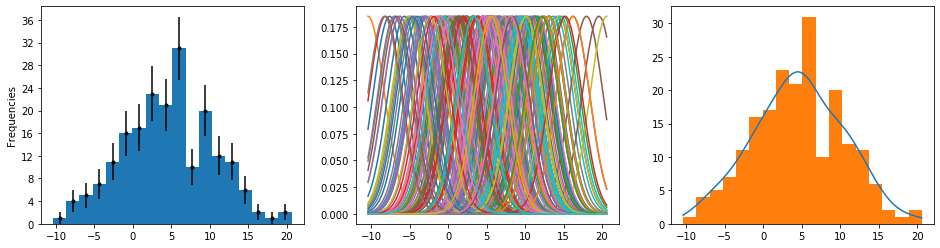

In [2]:
gridsize = (1, 3)
fig = plt.figure(figsize=(16, 4))
N = 200
sigma = 6
mu = 5
#x = sigma * npr.randn(N) + mu
x = npr.normal(loc = mu, scale = sigma, size = N)
b = int(0.6*(max(x)-min(x)))
hs = plt.subplot2grid(gridsize, (0, 0))
bin_counts, bin_edges, patches = plt.hist(x,bins=b)
plt.ylabel("Frequencies")
hs.yaxis.set_major_locator(plt.MultipleLocator(4))
bin_centres = (bin_edges[:-1] + bin_edges[1:]) / 2
"""mask = (bin_counts == 0)
bin_counts = np.delete(bin_counts,mask)
bin_centres = np.delete(bin_centres,mask)"""
y_error = (np.sqrt(bin_counts))
plt.errorbar(x=bin_centres, y=bin_counts,
             yerr=y_error, fmt='.k')

gaus = plt.subplot2grid(gridsize, (0, 1))
x1 = np.linspace(x.min(),x.max(),N)
vect_gaus = np.zeros((N,N))
#rang = np.linspace(mu-4*sigma,mu+4*sigma,N)
i=0
std = 1.06*np.std(x)*pow(np.size(x),-1/5)
for val in x:
    vect_gaus[i,:] = stats.norm.pdf(x1, val, std)
    gaus.plot(x1, vect_gaus[i],'-')
    i+=1

summed_gaus = np.sum(vect_gaus,axis = 0)
norm = scipy.integrate.trapz(summed_gaus, x1)
summ = plt.subplot2grid(gridsize,(0,2))
#print(norm)
hist_norm = scipy.integrate.trapz(bin_counts, bin_centres)
curve = (hist_norm/norm)*summed_gaus
norm1 = scipy.integrate.trapz(curve, x1)
#print(norm1)
#summ.plot(x1,summed_gaus,'-', label="No normaliz")
summ.plot(x1,curve,'-',label="Normaliz")
plt.hist(x,bins=b)
#plt.legend()
plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2021-12-14 23:48:39--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 2620:100:6025:18::a27d:4512, 162.125.69.18
Connessione a www.dropbox.com (www.dropbox.com)|2620:100:6025:18::a27d:4512|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2021-12-14 23:48:39--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a [www.dropbox.com]:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uca6b72878a44552b83dd6d8b5f6.dl.dropboxusercontent.com/cd/0/inline/Bb02dQLxAryv3tldut-ZpY0FPCMXjsYHOzzuwlHpgcNFznwHfcvt4uBlkv2OAASXJI570yJ5GUHrYJUXEPY6WGUFrum3sLJu9qWdEZGhA8KP105jwWMbhmYIoPU0dcHJchwjYaRygpQ33UfBzNDTbT1G/file# [segue]
--2021-12-14 23:48:39--  https://uca6b72878a44552b83dd6d8b5f6.dl.dropboxusercontent.com/

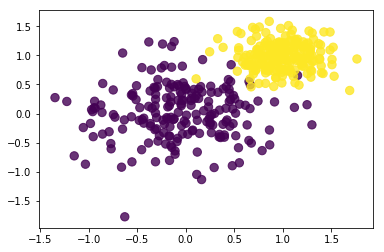

In [3]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

/home/riccardo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: covariance is not positive-semidefinite.
  # This is added back by InteractiveShellApp.init_path()


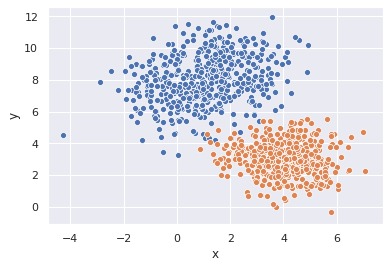

In [4]:
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")


mean1 = np.array([1,8])
mean2 = np.array([4,3])
std1 = [[2,1],[0.3,2.5]]
#std2 = [[3,1.2],[1.7,5]]
std2 = [[1,0],[0,1]]
data1 = np.random.multivariate_normal(mean1, std1, 500)
data2 = np.random.multivariate_normal(mean2, std2, 500)
df1 = pd.DataFrame(data1,columns=['x','y'])
df2 = pd.DataFrame(data2,columns=['x','y'])

sns.scatterplot(data=df1,x='x',y='y')
sns.scatterplot(data=df2,x='x',y='y')
plt.show()

In [5]:
!wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

--2021-12-14 23:48:41--  https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
Risoluzione di www.dropbox.com (www.dropbox.com)... 2620:100:6025:18::a27d:4512, 162.125.69.18
Connessione a www.dropbox.com (www.dropbox.com)|2620:100:6025:18::a27d:4512|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/hgnvyj9abatk8g6/residuals_261.npy [segue]
--2021-12-14 23:48:42--  https://www.dropbox.com/s/raw/hgnvyj9abatk8g6/residuals_261.npy
Riutilizzo della connessione esistente a [www.dropbox.com]:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uc566d973e281631e62363b5e5ac.dl.dropboxusercontent.com/cd/0/inline/Bb3BnZo8yETsoQxQYy30YBZAduFRCBNN21xLN-fHi_BjRXwl9yKKwCbgvu328_VOIay7JlYBecTBRrbLE3uydYSYqTt2UHYtHx6qWqYbE3X5BTTw5h4yQaRtxK2MDXqZ06Cf_eZcuukhYrEYDS-WIBSg/file# [segue]
--2021-12-14 23:48:43--  https://uc566d973e281631e62363b5e5ac.dl.dropboxusercontent.com/cd/0/inline/Bb3BnZo8yETsoQxQYy30YBZAduFRCB

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

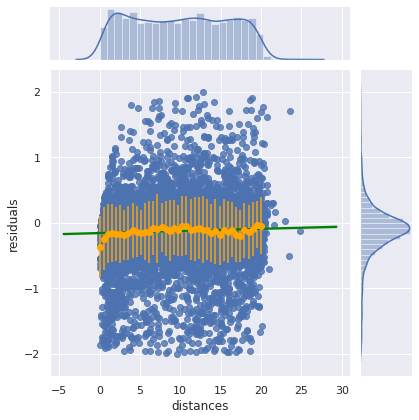

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


In [6]:
dataset = np.load("residuals_261.npy", allow_pickle = True)
dataF = pd.DataFrame(dataset.item())
dataF = dataF[abs(dataF["residuals"]) < 2]
linreg = scipy.stats.linregress(dataF["distances"],dataF["residuals"])
g = sns.jointplot("distances", "residuals", data=dataF, kind="reg", joint_kws = {"line_kws":{"color":"green"}})
#plt.show()
x = np.linspace(0,20,40)
y = [dataF["residuals"][(dataF["distances"] <= val+0.25) & (dataF["distances"] > val-0.25)].mean() for val in x]
erry = [dataF["residuals"][(dataF["distances"] < val+0.25) & (dataF["distances"] > val-0.25)].std() for val in x]
#plt.scatter(dataF["distances"],dataF["residuals"], color = "green")
plt.errorbar(x=x, y=y, yerr=erry, fmt = "o", color = "orange")
#plt.ylabel("Mean residuals")
#plt.xlabel("Distances")
plt.show()
dataF